### RNN
- 순환 신경망 <br><br>
- 문장일 떄 많이 사용된다. <br><br>
- 문장의 글자가 입력이 되면 셀이라고 하는 걸 통해서 한글자를 분리해 내고 이게 다시 셀에 들어가서 다음 단어와 합쳐져서 결과가 나오는 식이라고 이해하면 된다. <br><br>
- 순환 셀을 통해서 문장에 있는 단어 간의 관계를 알게 되는 것이다. <br><br>

### RNN 용어
- NLP (Natural Language Processing : 자연어처리) 라는 단어를 많이 사용한다. <br><br>
- 말뭉치 : 데이터셋 <br><br>
- 토큰 : 단어 <br><br>
- 어휘사전 : 어떠한 단어에 대해서 일렬 번호를 부여 <br><br>
    - 셀에 문장이 들어갔을 때 unique 한 단어한테 번호를 부여하는 것이다. <br><br>
    - 한글로 어휘사전 만드는 방법은 인터넷 참고하기를 바란다. <br><br>

--- 
### IMDB(Internet Movie Data Base)
- Train Data(25000) <br><br>
    - 긍정 : 12500 <br><br>
    - 부정 : 12500 <br><br>
- Test Data(25000) <br><br>
    - 긍정 : 12500 <br><br>
    - 부정 : 12500 <br><br>


In [60]:
from tensorflow.keras.datasets import imdb

In [61]:
(train_input , train_target),(test_input , test_target) = imdb.load_data(num_words=500)

In [62]:
train_input.shape

(25000,)

In [63]:
train_target.shape

(25000,)

In [64]:
test_input.shape

(25000,)

In [65]:
test_target.shape

(25000,)

### train의 첫번째 문장의 token 갯수 출력

In [66]:
len(train_input[0])

218

In [67]:
import numpy as np
len(np.unique(train_input[0]))

88

In [68]:
len(train_input[1])

189

> #### 이미지와 여태 하던 데이터와 다르게 input의 사이즈가 다르다.

### 첫번째 댓글의 출력

In [69]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


- sample의 시작분분은 토큰을 1로 사용. <br><br>
- 2는 선정된 단어의 갯수에 포함되지 않는 단어를 표현할 때 사용된다. <br><br>
- train_input 자체는 numpy배열이나 사용자마다 댓글에 사용한 토큰의 수가 다르기 때문에 numpy 배열을 사용하지 못하고 python list를 사용한다. <br><br>

In [70]:
# train_target 출력해보기
print(train_target[:10])

[1 0 0 1 0 0 1 0 1 0]


- 1은 긍정 , 0 은 부정 

### 훈련 세트 준비

In [71]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target  = \
    train_test_split(train_input,train_target,test_size=0.2,random_state=42)

In [72]:
# 각 리뷰마다 문장 길이를 시각화
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths),np.median(lengths),np.max(lengths),np.min(lengths))

239.00925 178.0 1854 11


> #### 중앙값보다 평균이 크므로 예상치 않게 길게 달린 댓글이 있다고 예측 가능

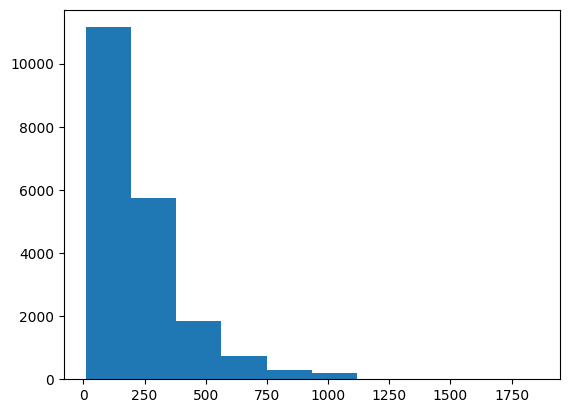

In [73]:
import matplotlib.pyplot as plt

plt.hist(lengths)

plt.show()

---
### Sequence padding
- 전체 자리수를 100으로 가정했을 경우 한 문장에 3개 토큰만 있을 경우 나머지 97개는 비워지고 이를 0으로 채우는 과정  <br><br>
- 100 자리가 넘을 경우 뒤에서부터 100개를 가져온다. 

In [74]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [75]:
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input,maxlen=100)

In [76]:
# 크기 확인
print(train_seq.shape)
print(val_seq.shape)

(20000, 100)
(5000, 100)


In [77]:
# 첫번째 댓글 확인
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [78]:
print(train_input[0][-100:])

[10, 4, 20, 9, 2, 364, 352, 5, 45, 6, 2, 2, 33, 269, 8, 2, 142, 2, 5, 2, 17, 73, 17, 204, 5, 2, 19, 55, 2, 2, 92, 66, 104, 14, 20, 93, 76, 2, 151, 33, 4, 58, 12, 188, 2, 151, 12, 215, 69, 224, 142, 73, 237, 6, 2, 7, 2, 2, 188, 2, 103, 14, 31, 10, 10, 451, 7, 2, 5, 2, 80, 91, 2, 30, 2, 34, 14, 20, 151, 50, 26, 131, 49, 2, 84, 46, 50, 37, 80, 79, 6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [79]:
# 5번째 댓글 확인
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [80]:
print(train_input[5])

[1, 2, 195, 19, 49, 2, 2, 190, 4, 2, 352, 2, 183, 10, 10, 13, 82, 79, 4, 2, 36, 71, 269, 8, 2, 25, 19, 49, 7, 4, 2, 2, 2, 2, 2, 10, 10, 48, 25, 40, 2, 11, 2, 2, 40, 2, 2, 5, 4, 2, 2, 95, 14, 238, 56, 129, 2, 10, 10, 21, 2, 94, 364, 352, 2, 2, 11, 190, 24, 484, 2, 7, 94, 205, 405, 10, 10, 87, 2, 34, 49, 2, 7, 2, 2, 2, 2, 2, 290, 2, 46, 48, 64, 18, 4, 2]


---
### 순환 신경망 모델 만들기

In [81]:
from tensorflow import keras

In [82]:
# one-hot encoding
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape) # shape 뒤에 두개를 input_shape에 넣으면 된다.

(20000, 100, 500)


In [83]:
val_oh = keras.utils.to_categorical(val_seq)

In [84]:
model = keras.Sequential()

model.add(keras.layers.SimpleRNN(
    8,
    input_shape = (100,500) # 500이 붙는 것은 one-hot encoding 때문이다.
))

model.add(keras.layers.Dense(
    1,
    activation='sigmoid'
))

In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [86]:
# RNN은 adam 보다 rmsprop을 많이 쓴다.
# rmspro 많이 셀 반복 가능
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('./Data/best-simple-rnn-model.h5')
earlystopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history = model.fit(train_oh,train_target,epochs=100,batch_size=64,
          validation_data = (val_oh,val_target),
          callbacks=[checkpoint_cb,earlystopping_cb]
          )

Epoch 1/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6952 - accuracy: 0.4985 - val_loss: 0.6946 - val_accuracy: 0.4956
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6929 - accuracy: 0.5100 - val_loss: 0.6931 - val_accuracy: 0.5072
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6914 - accuracy: 0.5181 - val_loss: 0.6920 - val_accuracy: 0.5134
Epoch 4/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6900 - accuracy: 0.5276 - val_loss: 0.6911 - val_accuracy: 0.5208
Epoch 5/100
313/313 [==============================] - 5s 18ms/step - loss: 0.6887 - accuracy: 0.5379 - val_loss: 0.6901 - val_accuracy: 0.5306
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6871 - accuracy: 0.5474 - val_loss: 0.6894 - val_accuracy: 0.5328
Epoch 7/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6853 - accuracy: 0.5551 - val_loss: 0.6883 - val_accuracy:

In [87]:
test_seq = pad_sequences(test_input,maxlen=100)
test_oh=keras.utils.to_categorical(test_seq)

In [88]:
model.evaluate(test_oh,test_target)

782/782 [==============================] - 4s 5ms/step - loss: 0.4609 - accuracy: 0.7858


[0.46086010336875916, 0.7857599854469299]

In [89]:
# 하나 예측해보기
np.round(model.predict(test_oh[10].reshape(-1,100,500)))

1/1 [==============================] - 0s 70ms/step


array([[1.]], dtype=float32)

Text(0.5, 0, 'epochs')

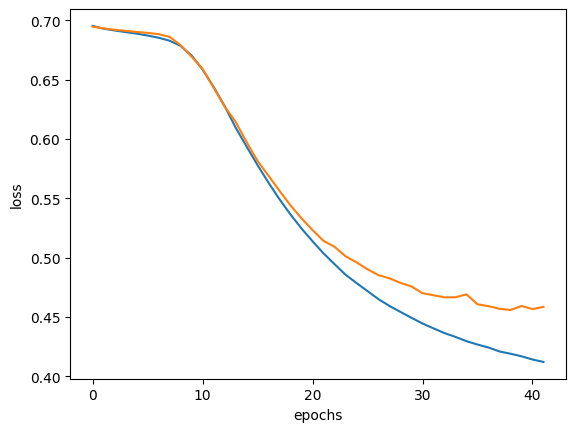

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

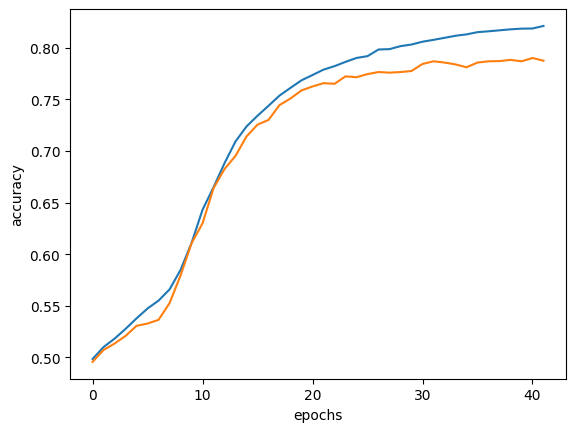

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epochs')

---
### LSTM 신경망 모델 구성하기
- 방금한 방식은 단어간의 관계는 안들어가는 것같다. <br><br>
- 이방식을 사용하면 단어간의 관계를 실수값으로 더 사용되는 듯 하다. <br><br>
- one-hot encoding을 따로 하지 않고 layers.Embedding을 통해서 하는 것 같은 느낌이다. <br><br>

In [92]:
model = keras.Sequential()

model.add(keras.layers.Embedding(
    500,
    16,
    input_length = 100
)) # .을 기준으로 문장 하나를 파악하는 느낌

model.add(keras.layers.LSTM(8)) # 문장들 몇개를 반복하는 느낌

model.add(keras.layers.Dense(1,activation='sigmoid'))

In [93]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('./Data/best-lstm-model.h5')
earlystopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history = model.fit(train_seq,train_target,epochs=100,batch_size=64,
          validation_data = (val_seq,val_target),
          callbacks=[checkpoint_cb,earlystopping_cb]
          )

Epoch 1/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6929 - accuracy: 0.5147 - val_loss: 0.6925 - val_accuracy: 0.5502
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6917 - accuracy: 0.5743 - val_loss: 0.6912 - val_accuracy: 0.5848
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6894 - accuracy: 0.6119 - val_loss: 0.6881 - val_accuracy: 0.6354
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6842 - accuracy: 0.6521 - val_loss: 0.6804 - val_accuracy: 0.6698
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6685 - accuracy: 0.6779 - val_loss: 0.6530 - val_accuracy: 0.6844
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6027 - accuracy: 0.7122 - val_loss: 0.5711 - val_accuracy: 0.7232
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5520 - accuracy: 0.7392 - val_loss: 0.5427 - val_accuracy:

Text(0.5, 0, 'epochs')

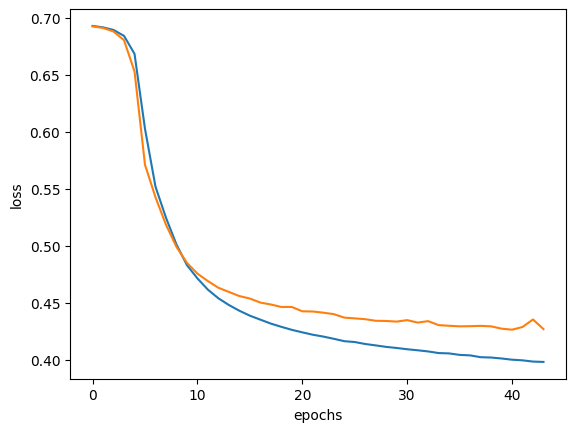

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

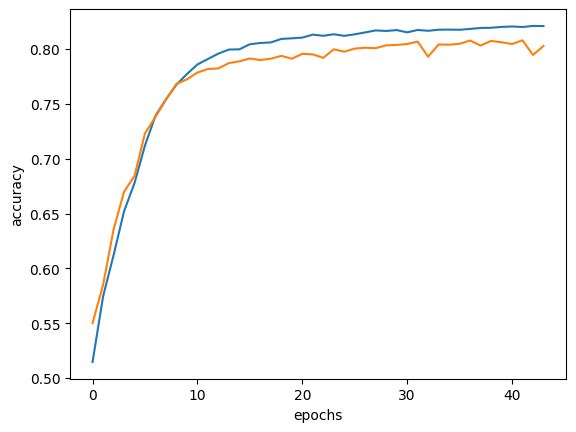

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epochs')

In [96]:
model.evaluate(test_seq,test_target)

782/782 [==============================] - 2s 2ms/step - loss: 0.4210 - accuracy: 0.8050


[0.4210304319858551, 0.8050000071525574]

### 순환층에 드롭아웃 적용하기
- 과대적합 되는 것을 줄이기 위해서 적용하는 것 같다.

In [97]:
model = keras.Sequential()

model.add(keras.layers.Embedding(
    500,
    16,
    input_length = 100
)) # .을 기준으로 문장 하나를 파악하는 느낌

model.add(keras.layers.LSTM(
    8,
    dropout=0.3
)) # 문장들 몇개를 반복하는 느낌

model.add(keras.layers.Dense(1,activation='sigmoid'))

In [98]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('./Data/best-lstm-dropout-model.h5')
earlystopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history = model.fit(train_seq,train_target,epochs=100,batch_size=64,
          validation_data = (val_seq,val_target),
          callbacks=[checkpoint_cb,earlystopping_cb]
          )

Epoch 1/100
313/313 [==============================] - 6s 15ms/step - loss: 0.6923 - accuracy: 0.5293 - val_loss: 0.6915 - val_accuracy: 0.5518
Epoch 2/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6902 - accuracy: 0.5816 - val_loss: 0.6886 - val_accuracy: 0.6154
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6856 - accuracy: 0.6252 - val_loss: 0.6815 - val_accuracy: 0.6544
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6695 - accuracy: 0.6663 - val_loss: 0.6459 - val_accuracy: 0.7050
Epoch 5/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6059 - accuracy: 0.7107 - val_loss: 0.5818 - val_accuracy: 0.7244
Epoch 6/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5718 - accuracy: 0.7251 - val_loss: 0.5599 - val_accuracy: 0.7410
Epoch 7/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5500 - accuracy: 0.7456 - val_loss: 0.5415 - val_accuracy:

Text(0.5, 0, 'epochs')

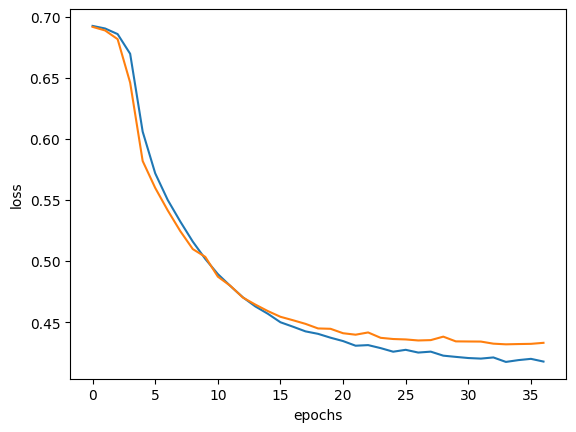

In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

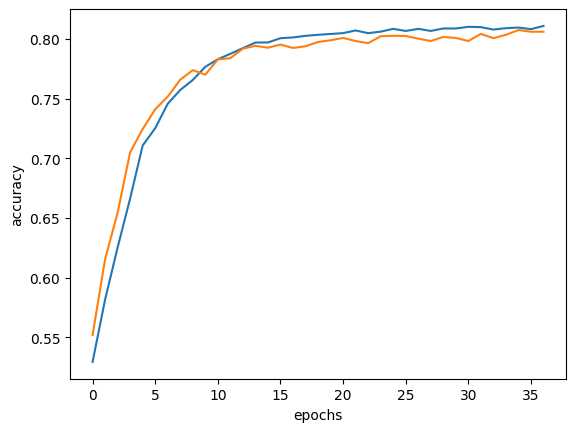

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epochs')

In [101]:
model.evaluate(test_seq,test_target)

782/782 [==============================] - 2s 2ms/step - loss: 0.4272 - accuracy: 0.8019


[0.4271937906742096, 0.8018800020217896]

### 2개층을 연결하기
- LSTM은 순환층이다. <br><br>
- 준 숫자만큼을 합쳐서 계산 하는 것이다. <br><br>
- return_sequences = True를 줘야 작업하던 내용을 이어서 작업을 하지 않으면 또 똑같이 작업을 하게 된다. <br><br>

In [102]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(
    500,
    16,
    input_length = 100
)) 

model3.add(keras.layers.LSTM(
    8,
    dropout=0.3,
    return_sequences=True
)) 

model3.add(keras.layers.LSTM(
    8,
    dropout=0.3
)) 

model3.add(keras.layers.Dense(1,activation='sigmoid'))

In [103]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('./Data/best-lstm-dropout-model2.h5')
earlystopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history = model3.fit(train_seq,train_target,epochs=100,batch_size=64,
          validation_data = (val_seq,val_target),
          callbacks=[checkpoint_cb,earlystopping_cb]
          )

Epoch 1/100
313/313 [==============================] - 10s 29ms/step - loss: 0.6928 - accuracy: 0.5268 - val_loss: 0.6925 - val_accuracy: 0.5248
Epoch 2/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6916 - accuracy: 0.5628 - val_loss: 0.6905 - val_accuracy: 0.6184
Epoch 3/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6870 - accuracy: 0.6201 - val_loss: 0.6811 - val_accuracy: 0.6648
Epoch 4/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6616 - accuracy: 0.6721 - val_loss: 0.6333 - val_accuracy: 0.7038
Epoch 5/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6155 - accuracy: 0.6961 - val_loss: 0.6028 - val_accuracy: 0.7074
Epoch 6/100
313/313 [==============================] - 9s 28ms/step - loss: 0.5878 - accuracy: 0.7161 - val_loss: 0.5713 - val_accuracy: 0.7278
Epoch 7/100
313/313 [==============================] - 9s 28ms/step - loss: 0.5600 - accuracy: 0.7348 - val_loss: 0.5480 - val_accuracy

Text(0.5, 0, 'epochs')

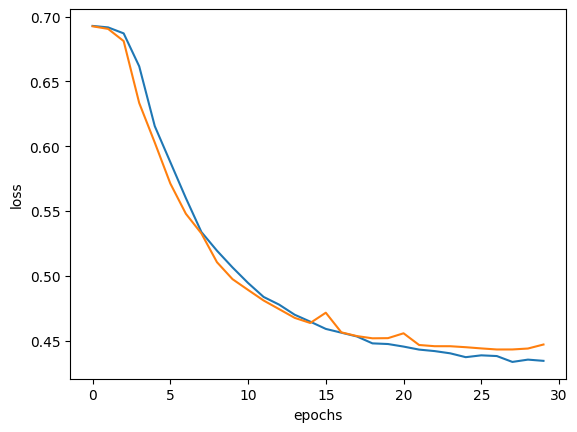

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

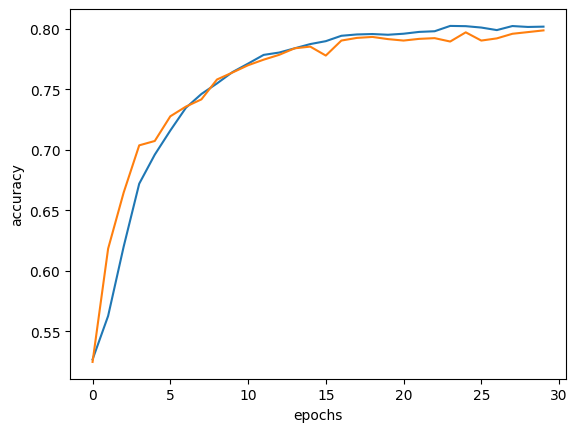

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epochs')

In [106]:
model.evaluate(test_seq,test_target)

782/782 [==============================] - 2s 2ms/step - loss: 0.4272 - accuracy: 0.8019


[0.4271937906742096, 0.8018800020217896]